# Data Analytics Tool 

## Introduction

This program is intended to complete a full data analyis.
It is able to clean the data and give a descriptive analysis results all based on the users preferences.
Any kind of csv file should be applicable.

## 1. Import of libraries and the data set 

In [416]:
## 1.1 get input 
# We need to get input for which csv file a user wants to upload. 
# with the given input we have to define a function that imports all libraries 
# and afterwards reads the data ("read_csv" needs pandas library imported to work!)

# user needs to make sure that this python file as well as the desired csv file is located
# in the same working directory! 

In [417]:
# 1.2 Imports
import math
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sn

In [418]:
# 1.3 read data 
listing = pd.read_csv("listings.csv")

## 2. Overview and Cleaning Data Set

In [419]:
## 2.1 showing max rows and columns of data set
print("Your data set includes the following number of rows and columns: ")
listing.shape

Your data set includes the following number of rows and columns: 


(7907, 16)

In [420]:
# 2.2 head

print("In the following table you can see the first eight observations of your data set.")
listing.head(8)

In the following table you can see the first eight observations of your data set.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355
5,71903,Room 2-near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34702,103.96103,Private room,104,1,39,2019-08-15,0.38,9,346
6,71907,3rd level Jumbo room 5 near EXPO,367042,Belinda,East Region,Tampines,1.34348,103.96337,Private room,208,1,25,2019-07-25,0.25,9,172
7,241503,"Long stay at The Breezy East ""Leopard""",1017645,Bianca,East Region,Bedok,1.32304,103.91363,Private room,50,90,174,2019-05-31,1.88,4,59


In [421]:
## 2.3 get further details of the data types 

print("""In the table below you will find more specific information about your data set:
(int64" and "float64" stands for numeric data, whereas "object" denotes categorical data)\n""")

listing.info()

# int64 and float64 stands for numeric data, where as object denotes categorical data.
# We see that host_id is saved as a integer, yet we will need to categorize this value for our analysis

In the table below you will find more specific information about your data set:
(int64" and "float64" stands for numeric data, whereas "object" denotes categorical data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null 

In [422]:
## 2.4 Transforming data types

# ask if there are any data types that don't seem to be correct
# we will need to get input from user and assign values which need to be transformed to lists
# object -> int64  (.apply(lambda x: int(x)))
# object -> float64 (.apply(lambda x: float(x)))
# int64 or float64 --> object (.apply(lambda x: str(x))))

# we need to check if the columns have been correctly written or if there are spelling mistakes!
# don't know how to implement this as of yet 
# but main question probably is: does input exist/is equal to our given variables? 


# we need to loop each list, for the chance of multiple entries per list. 



# transform id and host_id into categorical values
listing["id"] = listing.id.apply(lambda x: str(x))
listing["host_id"] = listing.host_id.apply(lambda x: str(x))


In [423]:
## 2.5 removing columns

# next step is to ask if user wants to delete columns
# again we need to check if user has typed the names correctly!

listing = listing.drop(["name", "host_name", "last_review"], axis = 1) # axis = 1 --> column

In [424]:
## 2.6 count number of null values

print("In the table below you can see the number of null values for each variable")

listing.isnull().sum()

In the table below you can see the number of null values for each variable


id                                   0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [425]:
## 2.7 remove NA values

# get input of user if he wants to delete all the rows including null values 

listing = listing.dropna(how ="any", axis=0) # axis = 0 --> row

In [426]:
## 2.8 Renaming columns

# again we ask which columns user wants to rename
# check again if correctly typed

# rename column "calculated_host_listings_count"
listing = listing.rename(columns={"calculated_host_listings_count": "listings_count"})

In [427]:
# 2.9check for duplicates 

# To get rid of duplicates I here checked if the *key* appears more than once (here: "id" of airbnb offers)
# A key in a data set is a variable which is unique. In other words, the key is the value whith which
# you can access each single observation. 
# Thus for our program we will need to ask the user for the key. The user must know this key! 
# The program hasn't got the intelligence to figure it out by itself. 

duplications = sum(listing.duplicated("id"))
print("We have", duplications, "duplications of Airbnb offers.")

We have 0 duplications of Airbnb offers.


In [428]:
# 2.10 quick overview of our cleaned data set 
print("\nPlease view your cleaned data set and verify if the information is correct:\n")
listing.info()


Please view your cleaned data set and verify if the information is correct:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5149 entries, 0 to 7767
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5149 non-null   object 
 1   host_id              5149 non-null   object 
 2   neighbourhood_group  5149 non-null   object 
 3   neighbourhood        5149 non-null   object 
 4   latitude             5149 non-null   float64
 5   longitude            5149 non-null   float64
 6   room_type            5149 non-null   object 
 7   price                5149 non-null   int64  
 8   minimum_nights       5149 non-null   int64  
 9   number_of_reviews    5149 non-null   int64  
 10  reviews_per_month    5149 non-null   float64
 11  listings_count       5149 non-null   int64  
 12  availability_365     5149 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 563.2+ KB


In [429]:
# 2.11 quick overview of our cleaned data set
print("\nAgain have a last look on the head your cleaned data set and give your approval!")
listing.head(8)



Again have a last look on the head your cleaned data set and give your approval!


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listings_count,availability_365
0,49091,266763,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,50646,227796,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365
2,56334,266763,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365
3,71609,367042,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353
4,71896,367042,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355
5,71903,367042,East Region,Tampines,1.34702,103.96103,Private room,104,1,39,0.38,9,346
6,71907,367042,East Region,Tampines,1.34348,103.96337,Private room,208,1,25,0.25,9,172
7,241503,1017645,East Region,Bedok,1.32304,103.91363,Private room,50,90,174,1.88,4,59


In [430]:
# 2.12 maybe include if everything is alright? if not we could repeat the process somehow
# for example if user says there is an error we start again somewhere above,
# and if everything is fine execute the code below:

print("\nPerfect!\nWe are left with the following number of observations and variables: ")
listing.shape


Perfect!
We are left with the following number of observations and variables: 


(5149, 13)

## 3. Univariate Analysis

Taking a closer look at each single variable.

In [431]:
##  3.0.1 split numerical and categorical data into two lists
print("\nWe now continue with our analyis of the data.")
# need to make this automatic, if necessary we can write it differently including removing the "def" function

def get_variable_type():   
     # numerical variables
    num_variables = listing.select_dtypes(include=["int64","float64"]).columns

    # categorical variables
    cat_variables = listing.select_dtypes(include=["object"]).columns
    cat_variables = cat_variables.drop(["id","host_id"])
    return list(num_variables), list(cat_variables)

num_variables, cat_variables = get_variable_type()


We now continue with our analyis of the data.


In [432]:
# 3.0.2 update

print("\nWe have split your data into two categories: numerical and categorical.\nYour cleaned data set contains", str(len(num_variables)), "numerical and", str(len(cat_variables)), "categorical variables.")


We have split your data into two categories: numerical and categorical.
Your cleaned data set contains 8 numerical and 3 categorical variables.


## 3.1 Categorical Data analysis


Below you can explore a grid of count plots including all the categorical data of your data set:



/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


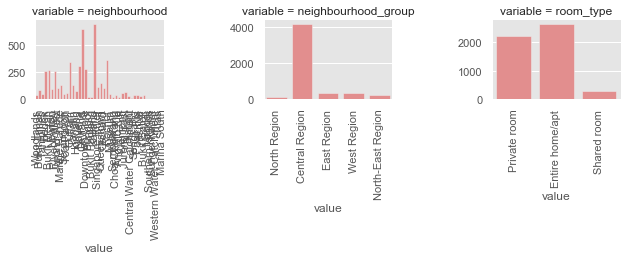

In [433]:
# 3.1.1 this first code should execute automatically
# it takes all categorical variables and plots them into a histogram
# it is kinda messy for some variables but I guess this is just how it is. 

print("\nBelow you can explore a grid of count plots including all the categorical data of your data set:\n")

cat_melt = pd.melt(listing, value_vars=sorted(cat_variables))
cat_grid = sn.FacetGrid(cat_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation="vertical")
cat_grid = cat_grid.map(sn.countplot, "value", color = "lightcoral",)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in cat_grid.axes.flat]
plt.show()

### Specific categorical analysis

In [434]:
# Here we need to ask which *categorical* columns the user wants to inspect more specifically.
# Asking for input and creating a list. correctly written is important once again!! 
# (we need to test for that somehow)
# However, here we can use a simple loop as we're just dealing with one function only
# (I use neighbourhood_group as an example to test the code)

In [435]:
## 3.1.2 value_counts 
#counts the number of each single group of category and presents result in a small df

print("\nHere you can see the different groups and their occurences in the data set:")
listing.neighbourhood_group.value_counts()


Here you can see the different groups and their occurences in the data set:


Central Region       4144
East Region           345
West Region           337
North-East Region     215
North Region          108
Name: neighbourhood_group, dtype: int64

In [436]:
## 3.1.3 listings_count and host_id
# I'd like to inlcude this somehow into the program because otherwise the categorical data seems kind of short
# it combines a categorical variable with a numeric, groups them by cat grups and delivers the numeric value
# however this code works because listings_count is the same for every host_id 
# I'm unsure how we can do this as every numeric variable can be different 
# we probably have to leave this out otherwise. 

l_count = listing.sort_values("listings_count").drop_duplicates(["host_id"])
l_count = l_count[["host_id", "listings_count"]]
l_count.sort_values("listings_count", ascending =False).head(15)

,host_id,listings_count
5235,66406177,274
1852,8492007,203
5053,209913841,157
4484,29420853,141
4621,31464513,114
6355,219550151,113
1785,2413412,112
3754,108773366,109
1589,23722617,84
6598,8948251,83


In [437]:
# 3.1.4 update
print("\nAs we have finished analysing the categorical variables we can now move on to the numerical variables.")


As we have finished analysing the categorical variables we can now move on to the numerical variables.


## 3.2 Numerical Data analysis


Below you can explore a grid of distribution plots including all the numerical data of your data set:



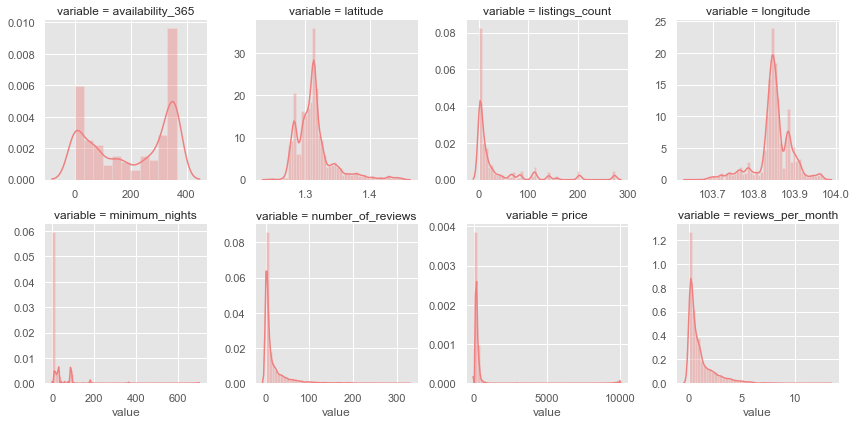

In [438]:
## 3.2.1 distribution grid plot of all numerical variables

print("\nBelow you can explore a grid of distribution plots including all the numerical data of your data set:\n")

# this code should be executed automatically
# it takes all numerical variables and plots them into an distribution plot

num_melt = pd.melt(listing, value_vars=sorted(num_variables))
num_grid = sn.FacetGrid(num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
num_grid = num_grid.map(sn.distplot, "value", color = "lightcoral")

###  Specific Numeric analysis


In [439]:
# Here we have to ask which *numerical* columns the user wants to insepct more specifically.
# Asking for input and creating a list. correctly written is important once again. 
# we need to use a loop such that it gives the output for each value in the list. 
# the loop should include all of the following steps before it moves on to the next value in the list. 


# in the follwing codes I will mostly use price to test the code

In [440]:
## 3.2.2 summary
# this part should come automatically, no user input required
# instead of price we need the specific variable the user wants to inspect

mean = listing.price.mean()
median = listing.price.median()
std = listing.price.std()
mini = listing.price.min()
q_25 = listing.price.quantile(q=0.25)
q_50 = listing.price.quantile(q=0.25)
q_75 = listing.price.quantile(q=0.25)
maxi = listing.price.max()

print("\nVariable *price* possesses the following properties:\n\nmean: \t\t", round(mean, 2),
      "\nmedian: \t", round(median, 2),
     "\nstd: \t\t", round(std, 2),
     "\nmin: \t\t", round(mini, 2),
     "\n25%: \t\t", round(q_25, 2),
     "\n50%: \t\t", round(q_50, 2),
     "\n75%: \t\t", round(q_75, 2),
     "\nmax: \t\t", round(maxi, 2))


Variable *price* possesses the following properties:

mean: 		 151.3 
median: 	 115.0 
std: 		 253.81 
min: 		 0 
25%: 		 62.0 
50%: 		 62.0 
75%: 		 62.0 
max: 		 10000


In [441]:
## 3.2.3 skew & Kurtosis
# this part should come automatically, no user input required
# again instead of (here) latitude and av

skew = listing.price.skew()
kurtosis = listing.price.kurtosis()

print("\nSkew: ", round(skew, 2) , "| Kurtosis: ", round(kurtosis, 2))

if skew >= -0.5 and skew <= 0.5:
    print("\nA skew value of", round(skew,2), "indicates a fairly symmetric distribution.")
if skew > 0.5 and skew <=1:
    print("\nA skew value of", round(skew,2), "indicates a moderately right skewed distribution.")
if skew >1:
    if skew > 10:
        print("\nA skew value of", round(skew,2), "indicates an extremely right skewed distribution.")
    else:
        print("\nA skew value of", round(skew,2), "indicates a highly right skewed distribution.")
if skew >= -1 and skew <-0.5:
    print("\nA skew value of", round(skew,2), "indicates a moderately left skewed distribution.")
if skew <-1:  
    if skew <-10:
        print("\nA skew value of", round(skew,2), "indicates an extremely left skewed distribution.")
    else:
        print("\nA skew value of", round(skew,2), "indicates a highly left skewed distribution.")
if kurtosis <2.9:
    if kurtosis<0:
        print("The kurtosis with a value of", round(kurtosis,2), "may indicate a bimodal distribution with two different modes.")
    if kurtosis >= 0:
        print("The kurtosis with a value of", round(kurtosis,2), "is platykurtic.\nThis indicates a low and broad peak.\nIn addition, this means that the distribution is shorter and tails are thinner.\nOutliers are less likely")
if kurtosis >3.1: 
    if kurtosis > 30:
        print("The kurtosis with a value of", round(kurtosis,2), "is extremely leptokurtic.\nThis indicates a very high and sharp peak.\nIn addition, this means that the distribution is long and fat tails are observable.\nOutliers are highly possible.")
    else:
        print("The kurtosis with a value of", round(kurtosis,2), "is leptokurtic.\nThis indicates a high and sharp peak.\nIn addition, this means that the distribution is long and fat tails are observable.\nOutliers are highly possible.")
if kurtosis >=2.9 and kurtosis <= 3.1:
    print("The kurtosis with a value of", round(kurtosis,2), "is Mesokurtic.\nThis indicates a similar distribution to a normal distribution.")


Skew:  27.45 | Kurtosis:  990.18

A skew value of 27.45 indicates an extremely right skewed distribution.
The kurtosis with a value of 990.18 is extremely leptokurtic.
This indicates a very high and sharp peak.
In addition, this means that the distribution is long and fat tails are observable.
Outliers are highly possible.


In [442]:
## 3.2.4 count outliers

print("\nThis variable contains a total of", sum((listing.price<q_25) | (listing.price>q_75)), "outliers.")
    


This variable contains a total of 5107 outliers.



Below you can examine a boxplot based on the variable *price*:


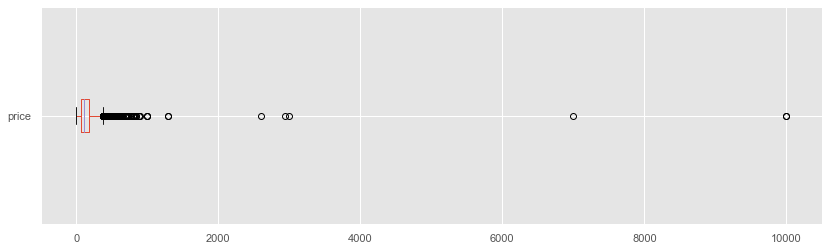

In [443]:
## 3.2.5 plotting boxplot to further 
# price should equal chosen variable

print("\nBelow you can examine a boxplot based on the variable *price*:")

plt.figure(figsize=(14,4))
listing.price.plot.box(vert = False)
plt.show()

In [444]:
# 3.2.6 maybe we ask if user wants to inspect more variables or if he is done examining the numerical values
# so we can move on to the corr matrix and then to the categorical data. 


Lastly, you can see a correlation matrix based on the numeric variables.
Please inspect it for potential and interesting correlations in your data set!


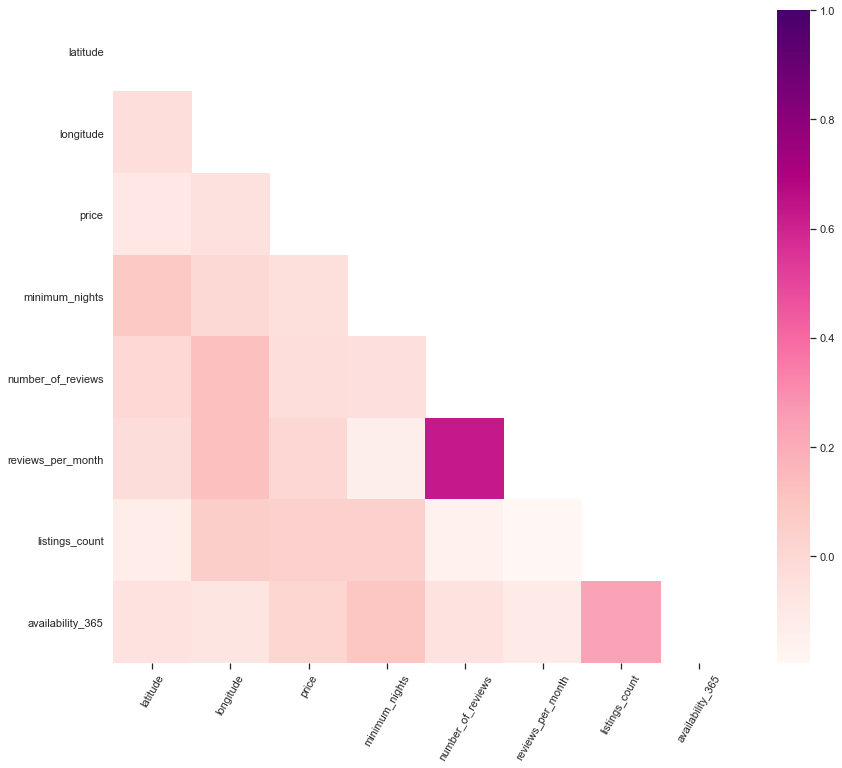

In [445]:
## 3.2.7 correlation Matrix of the numerical variables

# my idea is that this should come after the loop has ended to act as somekind of finisher. 
# it just needs to be executed automatically, the user then can make his findings by himself. 

print("\nLastly, you can see a correlation matrix based on the numeric variables.\nPlease inspect it for potential and interesting correlations in your data set!")

sn.set(style="white")
corr = listing.corr()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cmap = sn.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sn.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           mask=mask,
           cmap="RdPu")
ax.xaxis.tick_bottom()
plt.setp(ax.get_xticklabels(), rotation=60)
plt.show()

## 4. Conlcusion

In [449]:
# 4.1 last message

# maybe ask for yes and no, if yes go back to the very beginning?
# not sure how to implement this, just an idea 

print("\nWe hope you were able to get a deeper insight into your data set and are satisfied with the results.\n\nIn case you have other sets you would like to perform an analyisis on, don't hesitate and upload it to this program!")


We hope you were able to get a deeper insight into your data set and are satisfied with the results.

In case you have other sets you would like to do an analyisis on don't hesitate and upload it to this program!


## *Everything below is probably unnecessary code for the program and mainly used for back up and testing*

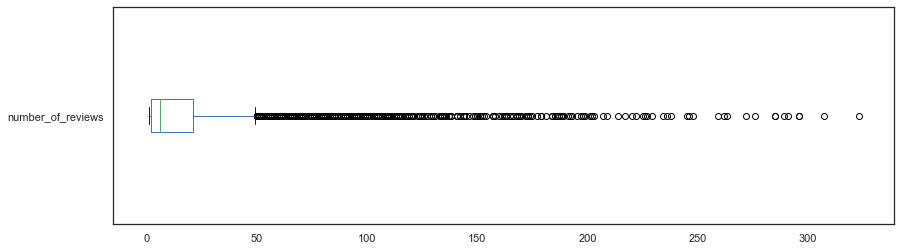

In [447]:
# second example with number of reviews just for testing 

plt.figure(figsize=(14,4))
listing.number_of_reviews.plot.box(vert = False)
plt.show()

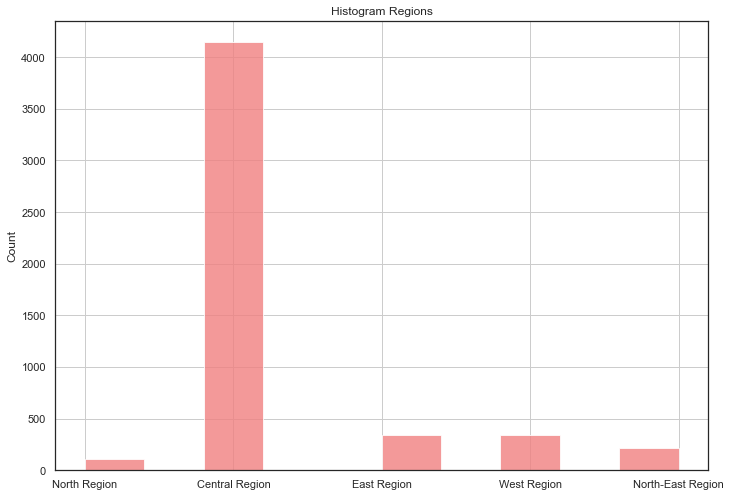

In [450]:
##  .hist  or plt.hist() plots histogramm for the counts of each group within the category
# 

listing.neighbourhood_group.hist(color="lightcoral", alpha=0.8)
plt.ylabel("Count")
plt.title("Histogram Regions")
plt.show()

In [ ]:
#### listings_count and host_id
l_count = listing.sort_values("listings_count").drop_duplicates(["host_id"])
l_count = l_count[["host_id", "listings_count"]]
l_count.sort_values("listings_count", ascending =False).head(15)

#### apparently we have many individuals that offer dozens if not hundreds of Airbnb 

In [ ]:
# Feature sorted by correlation to Price, from positive to negative
corr = corr.sort_values('price', ascending=False)
plt.figure(figsize=(10,12))
sn.barplot(corr.price[1:], corr.index[1:], orient='h', color="lightcoral")
plt.show()

## 2. Prediction

### 2.1 Prepare data

In [ ]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
#skewness = train_num.apply(lambda x: skew(x))
#skewness = skewness[abs(skewness) > 0.5]
#print(str(skewness.shape[0]) + " skewed numerical features to log transform")
#skewed_features = skewness.index
#train_num[skewed_features] = np.log1p(train_num[skewed_features])

### 2.2 Linear Regression

### 2.3 Ridge

### 2.4 Lasso

## 3. Conclusion